In [163]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [164]:
# On importe le fichier avec les données et on le convertit en tableau pandas 
filename = 'data.csv'
df = pd.read_csv(filename)

**Question 1**

In [3]:
df.head() # On affiche les 5 premiers éléments 

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


In [4]:
df.shape # On affiche la taille du tableau des observations

(9582, 6)

In [5]:
df.isnull().sum() # On affiche le nombre de valeurs manquantes par attribut

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64

Le tableau des observations a une taille de (9582,6). C'est à dire qu'il y a 9582 observations et chaque observation possède 6 attributs.
De plus, on peut constater qu'il y a des éléments manquants pour certain attribut (94 valeurs manquantes pour l'Experience par exemple)

**Question 2**

In [6]:
# On modifie éléments d'Expérience (de string en float) et on change le formalisme car les nombres en python sont avec des points et non des virgules.
df['Experience'] = df['Experience'].str.replace(',','.').astype(float)

In [7]:
# On calcule la médiane et la moyenne 
experience_mediane = df['Experience'].median()
experience_mean = df['Experience'].mean()
print(f'La médiane de l\'expérience est {experience_mediane} et la moyenne est {experience_mean}')

La médiane de l'expérience est 2.0 et la moyenne est 2.8141863406408096


In [8]:
mask = (df['Metier'] == 'Data scientist') & (df['Experience'].isna()) # Si data scientist et valeur manquante pour l'expérience
df.loc[mask, 'Experience'] = experience_mediane # On modifie la valeur avec la médiane

mask = (df['Metier'] == 'Data engineer') & (df['Experience'].isna()) # Si data engineer et valeur manquante pour l'expérience
df.loc[mask, 'Experience'] = experience_mean # On modifie la valeur avec la moyenne

In [9]:
df.isnull().sum() # On affiche le nombre de valeurs manquantes par attribut

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      42
Ville            0
dtype: int64

On peut remarquer qu'on a reduit le nombre de valeurs manquantes pour l'expérience

**Question 3**


In [10]:
# Pour chaque métier (data scientist, data engineer et lead data scientist), on calcule la moyenne
mean_data_scientist = df.loc[ df['Metier'] == 'Data scientist', 'Experience'].mean()
mean_data_engineer = df.loc[ df['Metier'] == 'Data engineer', 'Experience'].mean()
mean_lead_data_scientist = df.loc[ df['Metier'] == 'Lead data scientist', 'Experience'].mean()
print(f'Les expériences moyennes sont pour data scientist {mean_data_scientist}, data enginner {mean_data_engineer} et pour les lead data scientist {mean_lead_data_scientist}')

Les expériences moyennes sont pour data scientist 2.241267787839586, data enginner 2.9835039313220353 et pour les lead data scientist 3.965260545905707


**Question 4**

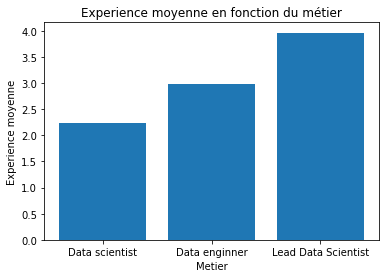

In [11]:
# On plot l'expérience moyenne en fonction des métiers
X = ['Data scientist', 'Data enginner', 'Lead Data Scientist']
Y = [mean_data_scientist,mean_data_engineer,mean_lead_data_scientist]

# On réalise un bar plot pour mieux le voir
plt.bar(X,Y)
plt.xlabel('Metier')
plt.ylabel('Experience moyenne')
plt.title('Experience moyenne en fonction du métier')
plt.show()

**Question 5**

In [12]:
df['Experience'].describe()

count    9540.000000
mean        2.811455
std         2.709288
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        21.000000
Name: Experience, dtype: float64

Grâce à ces valeurs pour le 1er, 2e et 3e quartiles, je vais pouvoir créer 4 catégories : débutant, confirmé, avancé, expert.


In [13]:
# On récupère les différents quartiles
exp_quartile_25 = df['Experience'].quantile(0.25)
exp_quartile_50 = df['Experience'].quantile(0.50)
exp_quartile_75 = df['Experience'].quantile(0.75)

In [14]:
# On associe les nouveaux labels pour chaque niveau d'expérience
df['Exp_label'] = df['Experience']
# On associe les nouvelles valeurs selon les critères (les quartiles)
df.loc[df['Experience'] > exp_quartile_75, 'Exp_label'] = 'expert'
df.loc[df['Experience'] <= exp_quartile_25, 'Exp_label'] = 'débutant'

mask = (df['Experience'] > exp_quartile_50) & (df['Experience'] <= exp_quartile_75)
df.loc[mask, 'Exp_label'] = 'avancé'

mask = (df['Experience'] > exp_quartile_25) & (df['Experience'] <= exp_quartile_50)
df.loc[mask, 'Exp_label'] = 'confirmé'

df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,débutant
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,avancé
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,avancé
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,confirmé
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé


**Question 6**

In [15]:
# On sépare les technologies par chaque élément présent
tech_values = df['Technologies'].str.split('/',expand=True)
tech_values

,0,1,2,3,4,5,6
0,Matlab,Python,Pyspark,Scikit-learn,Tensorflow,None,None
1,Python,Java,Scala,MongoDB,None,None,None
2,SPSS,SQL,Teradata,R,Python,Tensorflow,scikit-learn
3,C,C++,Java,Python,None,None,None
4,Matlab,Python,C++,numpy,Tensorflow,scikit-learn,None
...,...,...,...,...,...,...,...
9577,C++,R,Python,Matlab,Matplotlib,None,None
9578,Excel,Python,Matlab,R,machine learning,anglais,None
9579,R,machine learning,Excel,VBA,None,None,None
9580,Python,Pyspark,machine learning,Microsoft Azure,None,None,None


Python     6627
R          4374
SQL        2581
Java       1719
Hadoop     1589
           ... 
MySQL        94
ORACLE       94
Windows      75
Perl         74
Ruby         35
Length: 61, dtype: int64


<AxesSubplot:title={'center':'Technologies les plus utilisées'}, xlabel='Technologies', ylabel='Fréquence'>

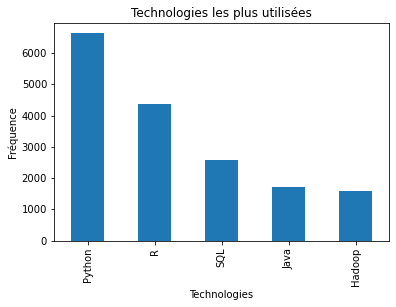

In [166]:
tech_data = tech_values.stack().reset_index(drop=True) # On rassemble toutes les données sur une même colonne.
counter = tech_data.value_counts() # Pour chaque élément unique, on compte la redondance.

print(counter) # On affiche ce compteur

# On plot en bar les 5 technologies les plus utilisées et la fréquence associée.
X = counter[:5]
X.plot.bar(X, title = 'Technologies les plus utilisées', xlabel = 'Technologies', ylabel = 'Fréquence')

**Question 7**

In [149]:
# On transforme les données qui nous seront utiles pour qu'elles deviennent exploitables

# On convertit une variable catégorielle en variables factices avec get_dummies 
a = pd.get_dummies(df.Diplome, prefix='Diplome')
b = pd.get_dummies(df.Exp_label, prefix='Exp')
new_df = pd.concat([a,b],axis = 1) # On fusionne les 2 listes 

# On ajoute également une valeur pour la présence des 5 premières technologies les plus utilisées (1 si oui, 0 si non)
for tech in X.index : 
    tech_name = f'Tech_{tech}'
    new_df[tech_name] = tech_values.isin([tech]).sum(axis=1)

# On convertit une variable catégorielle en variables factices avec get_dummies  
c = pd.get_dummies(df.Metier, prefix='Metier')
new_df = pd.concat([new_df,c],axis = 1) # On le fusionne avec le tableau utile

new_df.head() # On affiche le nouveau tableau

,Diplome_Bachelor,Diplome_Master,Diplome_No diploma,Diplome_Phd,Exp_avancé,Exp_confirmé,Exp_débutant,Exp_expert,Tech_Python,Tech_R,Tech_SQL,Tech_Java,Tech_Hadoop,Metier_Data architecte,Metier_Data engineer,Metier_Data scientist,Metier_Lead data scientist
0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
2,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0


In [150]:
# On sépare le tableau en 2 autres (le premier x_validation s'il manque le métier dans les informations, le second (new_df) sinon)
mask = (new_df['Metier_Data architecte'] == 0) & (new_df['Metier_Data engineer'] == 0) & (new_df['Metier_Data scientist'] == 0) & (new_df['Metier_Lead data scientist'] == 0)
x_validation = new_df.loc[mask]

mask = ( (new_df['Metier_Data architecte'] == 1) + (new_df['Metier_Data engineer'] == 1) + (new_df['Metier_Data scientist'] == 1) + (new_df['Metier_Lead data scientist'] == 1) ) 
new_df = new_df.loc[mask]

Je vais réaliser une méthode de clustering non supervisée. Je vais utiliser la méthode de clustering KMeans avec 4 clusters (qui correspond aux nombres d'expérience différent, aux nombres de différents métiers et aux nombres de différents diplômes).

In [174]:
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

# On normalise les données 
new_df_Q7 = (new_df - new_df.mean()) / new_df.std()
data = new_df_Q7.values

clusters = 4
clustering = KMeans(n_clusters=clusters, random_state=0).fit(data)

print(f'Number of cluster {clusters} - Le score : {clustering.score(data)}')

Number of cluster 4 - Le score : -109138.28497576722


Le score représente la somme des distances de chaque observation avec les centroïdes.

Je vais représenter en 3D les observations et les clusters associés. Pour cela, je réalise une décomposition PCA à 3 composants puis on affiche les nouvelles données en 3D

La variance expliquée avec le model est de : 0.3913412983645244


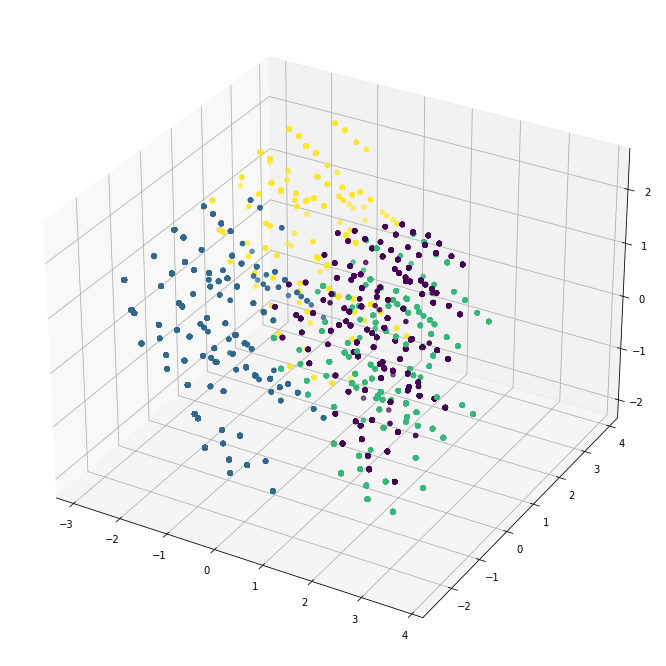

In [180]:
# On initialise le model
model_pca = PCA(n_components=3).fit(data)
data_pca = model_pca.transform(data)

print(f'La variance expliquée avec le model est de : {model_pca.explained_variance_ratio_.cumsum()[-1]}')

# On plot les données 
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
x = data_pca[:,0]
y = data_pca[:,1]
z = data_pca[:,2]
ax.scatter(x,y,z,c=clustering.labels_)
plt.show()

**Question 8**

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# On divise les données entre les attributs à prédire (y) et en valeur d'entrée (x)
x = new_df.iloc[:,:-4]
y = new_df.iloc[:,-4:]

# On divise le data set en training set et testing set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

clf = DecisionTreeClassifier().fit(X_train,y_train) # On entraîne l'arbre de décision avec le training set
y_predict = clf.predict(X_test) # On prédit avec le model les valeurs de y_test 

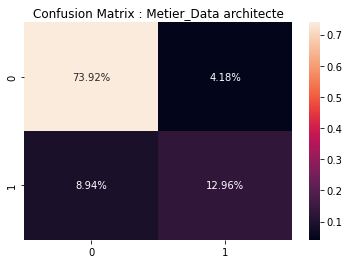

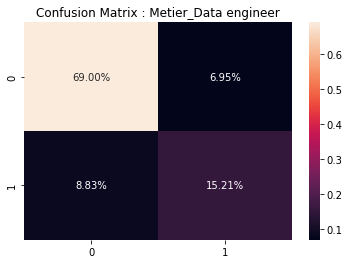

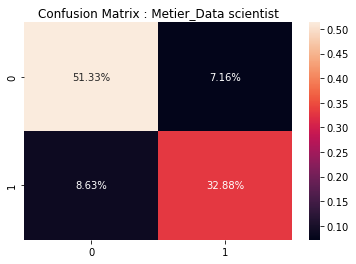

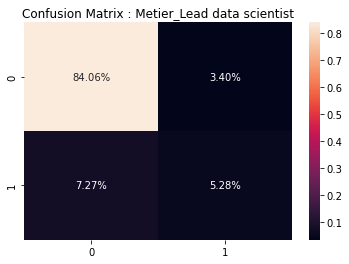

In [184]:
from sklearn.metrics import multilabel_confusion_matrix

confusion_matrix = multilabel_confusion_matrix(y_test, y_predict) # On calcule la matrice de confusion pour multiclass

acc_list = []
# On affiche ces données 
for i, matrix in enumerate(confusion_matrix) : 
    acc_list.append( (matrix[0][0] + matrix[1][1])/np.sum(matrix) )
    sns.heatmap(matrix/np.sum(matrix), annot=True,fmt='.2%')
    plt.title(f'Confusion Matrix : {y.columns[i]}')
    plt.show()


In [185]:
acc_list

[0.8687924725561944,
 0.8421327757449033,
 0.8421327757449033,
 0.8933612127548354]

On peut remarquer que la performance de base de l'algorithme est de 86%.

In [186]:
# Pour reconstruire les noms 
def reconstruction_label(label_list) : 
    metier = []
    for y in label_list : 
        if (y[0] == 1) : 
            metier.append('Data architecte')
        if (y[1] == 1) : 
            metier.append('Data engineer')
        if (y[2] == 1) : 
            metier.append('Data scientist')
        if (y[3] == 1) : 
            metier.append('Lead data scientist')
    return(np.array(metier))

y_validation = clf.predict(x_validation.values[:,:-4])
reconstruction_label(y_validation)

array(['Data engineer', 'Data scientist', 'Data scientist',
       'Data scientist', 'Data engineer', 'Data scientist',
       'Data scientist', 'Lead data scientist', 'Data engineer',
       'Data scientist', 'Data architecte', 'Data architecte',
       'Data architecte', 'Data scientist', 'Data engineer',
       'Data scientist', 'Data architecte', 'Data scientist',
       'Lead data scientist'], dtype='<U19')

Voici la liste des métiers prédit avec notre modèle pour les observations qui n'ont des valeurs manquantes pour le métier.